# Decision Trees Exersice 

### First Step : Download __[Titanic Data](https://www.kaggle.com/c/titanic/data)__  
- **NOTE** : use only  file `train.csv`from data.
#### 1. Import library of pandas and numpy

In [1]:
import pandas as pd
import numpy as np

#### 2. Load Data using Pandas

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 3. Check column in Dataset and Drop useless columns 

- **Hint** : useless columns `Name`, `Ticket`,`PassengerId` and `Cabin`

In [3]:
df_clean = df.drop(['Name','Ticket','PassengerId','Cabin'], axis = 1)
df_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### 4. Checking null values in each column and Handle with Mode

- **Hint** : 
- 1. for `Age` use Mode since there is outliers in this column
- 2. for `Embarked` use Mode since it is a categorical variable


In [4]:
df_clean.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [5]:
age_mode = df_clean['Age'].mode()
embarked_mode = df_clean['Embarked'].mode()
nan_replacements = {'Age': age_mode[0],'Embarked': embarked_mode[0]}
new_df = df_clean.fillna(nan_replacements)
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### 5. Handle Categorical Data using `get_Dummies()` in pandas 

- **Hint** : Handle only columns `Sex` and `Embarked`
- 
 Read this document on how to use [`get_Dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)  

In [6]:
dum_df = pd.get_dummies(data = new_df, columns=['Sex', 'Embarked'])
dum_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


#### 6.  Separate  X ( features ) from  Y (labels)
**Hint** : 
- goal : predict only passengers survive and or not be

In [7]:
X = dum_df.iloc[:,1:] 
y = dum_df.iloc[:, :1]

In [8]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [9]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


#### 7. Split data into the Training data and Test data by `random_state=5` and `test_size=0.25`

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

#### 8. Scale all Data using `StandardScaler` 

In [11]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### 9.Building your model ( Decision Tree )
 Use the default sklearn parameters with `random_state=1`

In [12]:
from sklearn.tree import DecisionTreeClassifier
tr = DecisionTreeClassifier(random_state=1)
tr.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [13]:
print(f'Decision Tree has {tr.tree_.node_count} nodes with a maximum depth of {tr.tree_.max_depth}.')

print(f'Model Accuracy for train data: {tr.score(X_train, y_train)}')
print(f'Model Accuracy for test data: {tr.score(X_test, y_test)}')

Decision Tree has 341 nodes with a maximum depth of 19.
Model Accuracy for train data: 0.9835329341317365
Model Accuracy for test data: 0.8295964125560538


#### 10. Use  pruning  decision Tree to determine the best maximum depth for test data

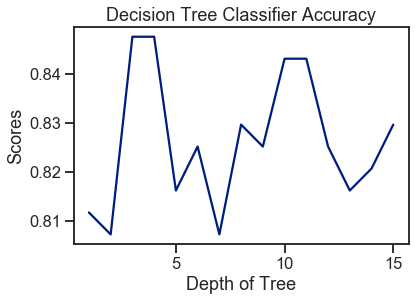

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
scores = []

for i in range(1, 16):
    tree = DecisionTreeClassifier(random_state=1, max_depth=i)
    tree.fit(X_train, y_train)
    score = tree.score(X_test, y_test)
    scores.append(tree.score(X_test, y_test))
    
# Plot graph to see how individual accuracy scores changes with tree depth

# learn more about sns and "context" https://datavizpyr.com/seaborn-set_context-to-adjust-size-of-plot-labels-and-lines/
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('ticks')

plt.plot(range(1, 16), scores)
plt.xlabel("Depth of Tree")
plt.ylabel("Scores")
plt.title("Decision Tree Classifier Accuracy")
plt.show()

#### 11.Building your model ( Random Forest)
 - Use parameters with  `oob_score=True` , `random_state=1`, ` warm_start=True` and `n_jobs=-1` .
 - Use number of trees in range 200 : 300

C:\Users\amira\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\amira\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\amira\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\amira\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

[Text(0, 0.5, 'out-of-bag error'),
 Text(0.5, 1.0, 'Evaluation of Out-of-Bag Error')]

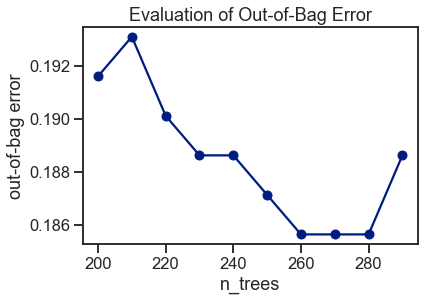

In [15]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(oob_score = True, random_state = 1, warm_start = True, n_jobs = -1)

oob_list = list()

# Iterate through all of the possibilities for the number of trees
for n_trees in range(200, 300, 10):
    RF.set_params(n_estimators=n_trees)  # Set number of trees
    RF.fit(X_train, y_train)
    oob_error = 1 - RF.oob_score_ # Obtain the oob error
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

ax = rf_oob_df.plot(legend=False, marker='o')
ax.set(ylabel='out-of-bag error',
      title='Evaluation of Out-of-Bag Error')

In [16]:
# Create the model with 150 trees
forest = RandomForestClassifier(n_estimators = 250, random_state = 1, n_jobs = -1)

# Fit training data and training labels to forest
forest.fit(X_train, y_train)

C:\Users\amira\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [17]:
n_nodes = []
max_depths = []

for ind_tree in forest.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Random Forest has an average number of nodes {int(np.mean(n_nodes))} with an average maximum depth of {int(np.mean(max_depths))}.')

print(f'Model Accuracy for train data: {forest.score(X_train, y_train)}')
print(f'Model Accuracy for test data: {forest.score(X_test, y_test)}')

Random Forest has an average number of nodes 280 with an average maximum depth of 17.
Model Accuracy for train data: 0.9835329341317365
Model Accuracy for test data: 0.820627802690583


#### 12. Calculate Confusion Matrix ,precision,recall and F1-score for the Decision Tree model & Random Forest

In [18]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

tr_pred = tree.predict(X_test)
fr_pred = forest.predict(X_test)
print("Classification Report for Decision Tree:\n ",
      metrics.classification_report(y_test, tr_pred))


print("Classification Report for Random Forest:\n ",
      metrics.classification_report(y_test, fr_pred))

Classification Report for Decision Tree:
                precision    recall  f1-score   support

           0       0.85      0.88      0.87       140
           1       0.78      0.75      0.77        83

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223

Classification Report for Random Forest:
                precision    recall  f1-score   support

           0       0.85      0.87      0.86       140
           1       0.77      0.73      0.75        83

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



Confusion Matrix for Decision:



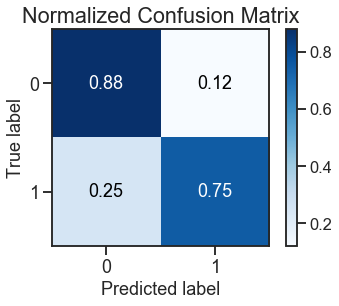

Confusion Matrix for Random Forest:



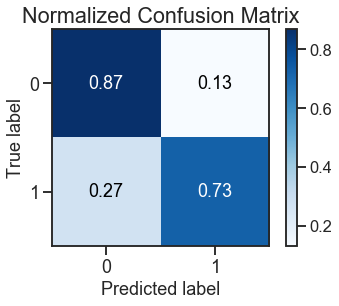

In [19]:
import scikitplot as skplt
print("Confusion Matrix for Decision:\n")
skplt.metrics.plot_confusion_matrix(y_test, tr_pred, normalize=True)
plt.show()

print("Confusion Matrix for Random Forest:\n")
skplt.metrics.plot_confusion_matrix(y_test, fr_pred, normalize=True)
plt.show()

#### 13.Building your model (SVM )
 Use the default sklearn parameters with `random_state=1`

In [20]:
from sklearn.svm import SVC
clf = SVC(random_state = 1)
clf.fit(X_train, y_train)

C:\Users\amira\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [21]:
clf_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, clf_pred))

Accuracy: 0.852017937219731


#### 12. Calculate Confusion Matrix ,precision,recall and F1-score for the SVM model

In [22]:
print("Classification Report for SVM:\n ",
      metrics.classification_report(y_test, clf_pred))

Classification Report for SVM:
                precision    recall  f1-score   support

           0       0.83      0.96      0.89       140
           1       0.90      0.67      0.77        83

    accuracy                           0.85       223
   macro avg       0.87      0.82      0.83       223
weighted avg       0.86      0.85      0.85       223



Confusion Matrix for Random Forest:



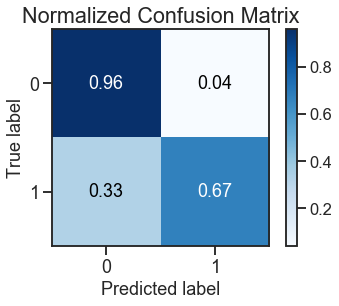

In [23]:
print("Confusion Matrix for Random Forest:\n")
skplt.metrics.plot_confusion_matrix(y_test, clf_pred, normalize=True)
plt.show()